In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
dataset = pd.read_csv('c:\Beasiswa.csv')
dataset.sample(4)

,Nama,Nim,Gender,Nilai,Beasiswa,Active
3,Rachel,5656881,Female,95,2000000,4
1,Jo,8535655,Male,85,1850000,4
0,Mich,8565564,Male,90,1900000,4
2,Bagus,6656885,Male,80,1750000,4


In [60]:
X = dataset.iloc[:,[3,4]].values
y = dataset.iloc[:,[-2]].values

In [61]:
# docs:
# https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/

In [62]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [63]:
# docs:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [64]:
X_train

array([[     95, 2000000],
       [     85, 1850000],
       [     90, 1900000]], dtype=int64)

In [65]:
y_train

array([[2000000],
       [1850000],
       [1900000]], dtype=int64)

In [66]:
X_test

array([[     80, 1750000]], dtype=int64)

In [67]:
y_test

array([[1750000]], dtype=int64)

In [68]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [69]:
# docs:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [70]:

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Acer\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [71]:
# docs:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [72]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1900000], dtype=int64)

In [73]:
y_actual = y_test.flatten()
y_actual

array([1750000], dtype=int64)

In [74]:
for i in range(len(y_actual)):
    print(f'Hasil aktual: {y_actual[i]} hasil prediksi: {y_pred[i]}')

Hasil aktual: 1750000 hasil prediksi: 1900000


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

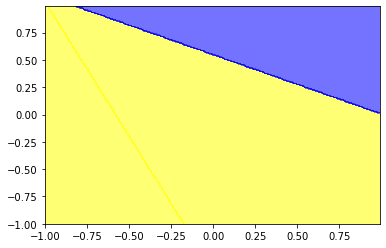

In [85]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.55, cmap = ListedColormap(('yellow', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Nilai')
plt.ylabel('Beasiswa')
plt.legend()
plt.show()